In [29]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

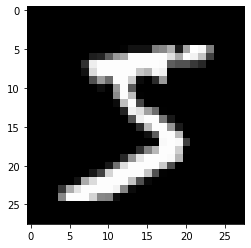

5


In [31]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [32]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [33]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [34]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0864 - val_accuracy: 0.9803
Epoch 2/3
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.1119 - val_accuracy: 0.9796
Epoch 3/3
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.1380 - val_accuracy: 0.9759


Prediction (Softmax) from the neural network:
 [[9.9999988e-01 3.8306851e-16 3.8959268e-08 8.2140469e-16 1.7083690e-12
  3.7759531e-12 1.4433962e-07 1.7631187e-13 8.3899554e-11 1.3877464e-10]]

Hard-maxed form of the prediction: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

--------- Prediction --------- 



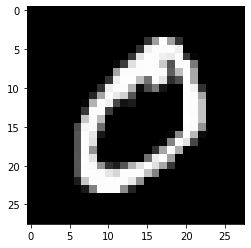


Final Output: 0


In [40]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))
## Third output
print ("\n--------- Prediction --------- \n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\nFinal Output: {}".format(np.argmax(prediction)))

In [41]:
image = cv2.imread('./test_image.jpeg')

In [42]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

In [43]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

In [44]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




----------------Contoured Image--------------------


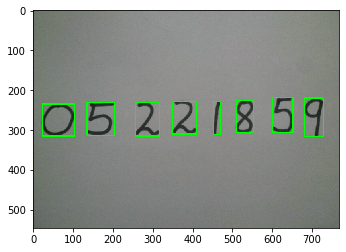

In [45]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

=========PREDICTION============ 



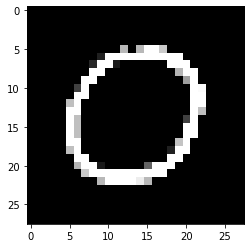


Final Output: 0

Prediction (Softmax) from the neural network:
 [[1.0000000e+00 1.1635895e-20 3.2157892e-13 4.6216252e-15 7.2787683e-24
  1.1030346e-21 8.0629253e-15 3.0842498e-15 5.1817193e-13 8.8959450e-13]]

Hard-maxed form of the prediction: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



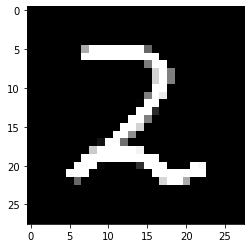


Final Output: 2

Prediction (Softmax) from the neural network:
 [[1.0039683e-21 5.3823036e-16 1.0000000e+00 4.4492388e-15 2.4847562e-24
  2.6766866e-25 1.0747192e-23 1.0101068e-14 8.9526899e-18 1.3335931e-21]]

Hard-maxed form of the prediction: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



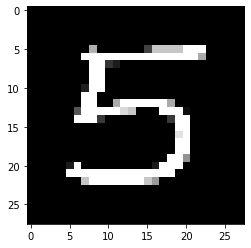


Final Output: 5

Prediction (Softmax) from the neural network:
 [[8.4429716e-24 6.6823076e-23 3.0661902e-26 1.6370814e-17 5.1893923e-25
  1.0000000e+00 7.7551022e-23 7.4790561e-25 3.8075406e-21 3.8253184e-20]]

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



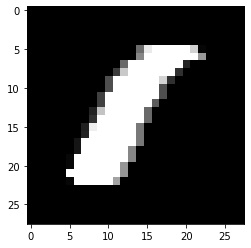


Final Output: 8

Prediction (Softmax) from the neural network:
 [[3.2260697e-05 3.5805002e-02 5.8642425e-05 1.6094424e-08 3.5551925e-06
  3.4658130e-02 1.3513043e-05 3.8790442e-09 9.2942244e-01 6.3889988e-06]]

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

---------------------------------------

=========PREDICTION============ 



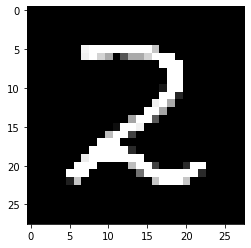


Final Output: 2

Prediction (Softmax) from the neural network:
 [[8.1324117e-19 8.0017769e-20 1.0000000e+00 2.3420947e-11 1.2286513e-23
  9.5237575e-27 2.2573125e-22 2.4776499e-15 9.7894089e-12 8.5188260e-19]]

Hard-maxed form of the prediction: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



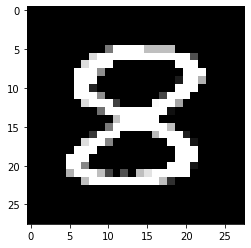


Final Output: 8

Prediction (Softmax) from the neural network:
 [[1.5392155e-18 1.4109427e-21 2.0030928e-08 1.6821563e-08 8.3257060e-20
  1.4028180e-09 3.1973562e-20 5.8776816e-18 1.0000000e+00 6.1977242e-12]]

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

---------------------------------------

=========PREDICTION============ 



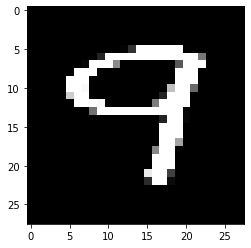


Final Output: 7

Prediction (Softmax) from the neural network:
 [[2.5652283e-10 1.2764250e-13 2.0631075e-01 1.6361367e-04 1.2082836e-08
  2.0402019e-11 6.1916245e-16 7.0863682e-01 1.8321587e-02 6.6567220e-02]]

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



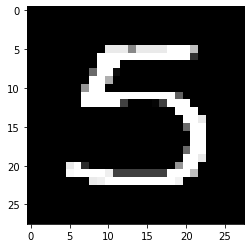


Final Output: 5

Prediction (Softmax) from the neural network:
 [[5.6583809e-25 6.6114543e-26 1.0519771e-21 3.0198207e-16 1.4109238e-25
  1.0000000e+00 2.1407037e-16 1.6519324e-22 1.7777860e-19 3.8058851e-21]]

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------



In [46]:
for digit in preprocessed_digits:
    
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("=========PREDICTION============ \n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))
    print ("\n---------------------------------------\n")




----------------Contoured Image--------------------


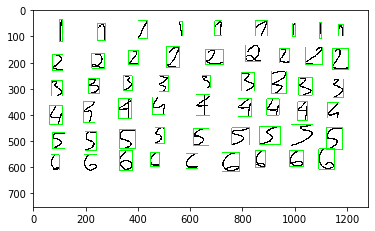

In [47]:
image = cv2.imread('./test_image2.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

=========PREDICTION============ 



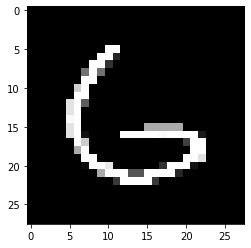


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



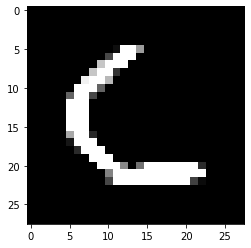


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



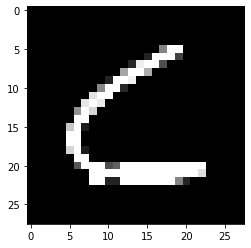


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



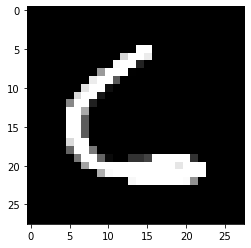


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



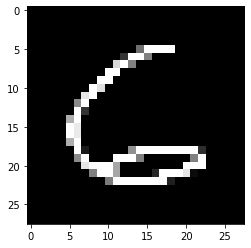


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



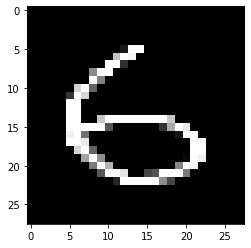


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



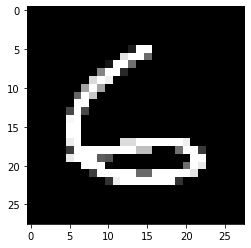


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



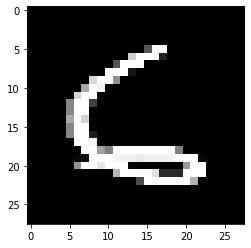


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



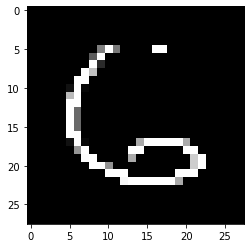


Final Output: 6

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



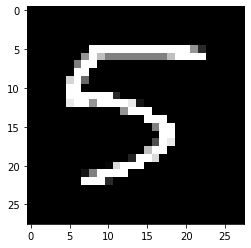


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



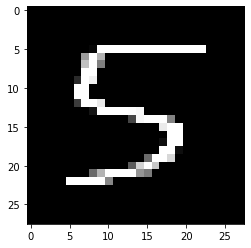


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



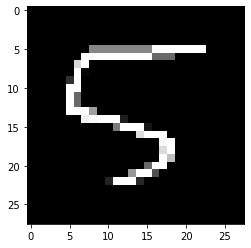


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



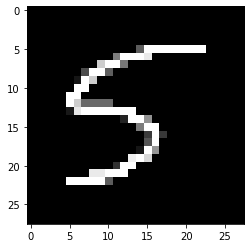


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



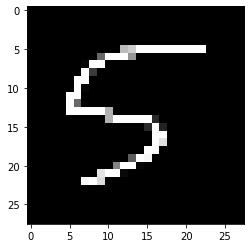


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



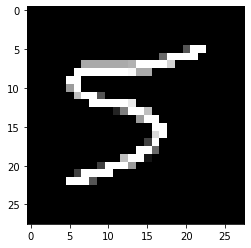


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



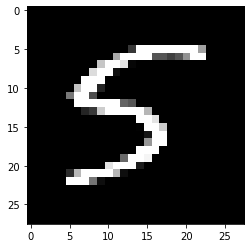


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



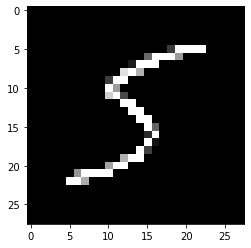


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



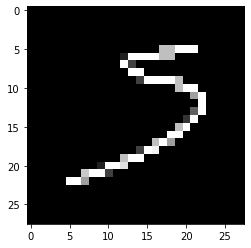


Final Output: 0

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



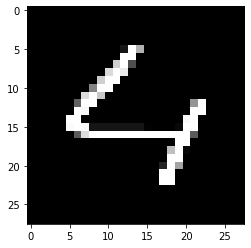


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



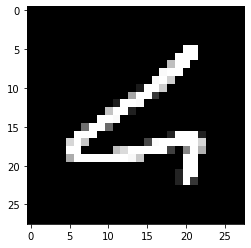


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



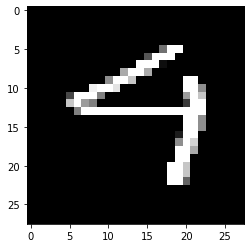


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



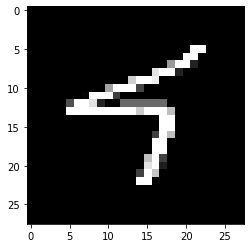


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



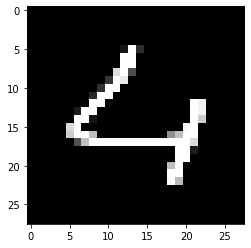


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



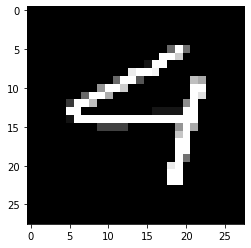


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



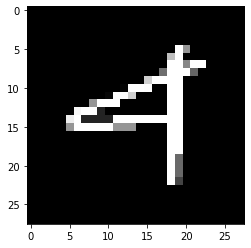


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



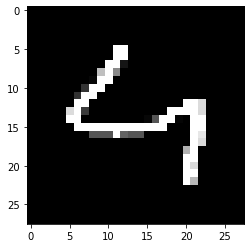


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



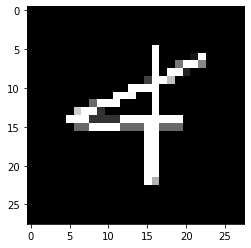


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



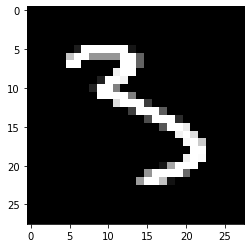


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



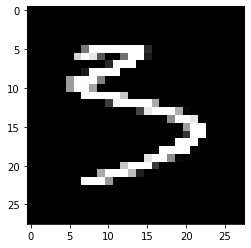


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



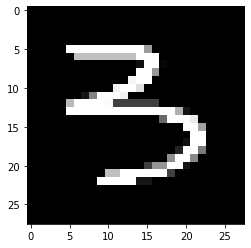


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



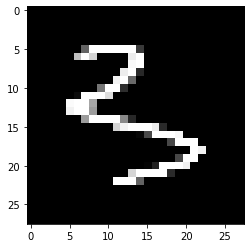


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



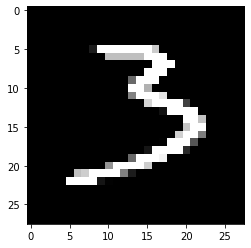


Final Output: 7

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



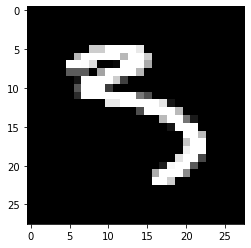


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



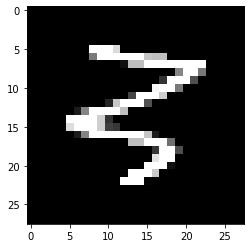


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



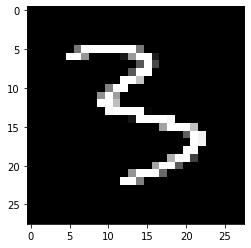


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



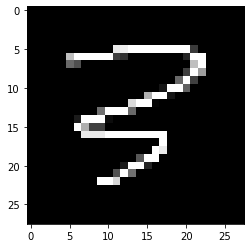


Final Output: 3

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



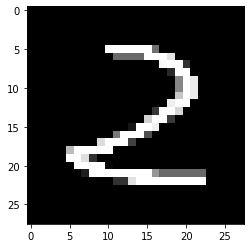


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



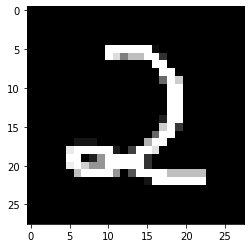


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



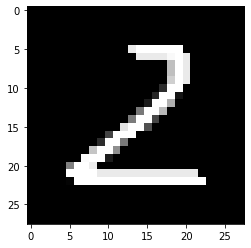


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



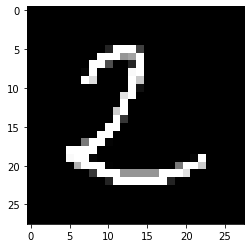


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



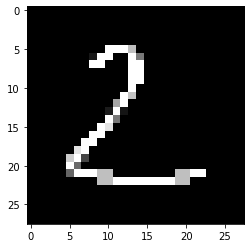


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



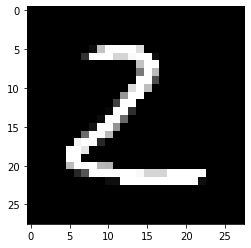


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



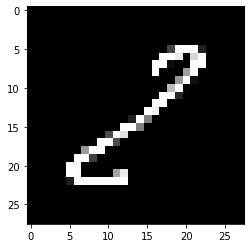


Final Output: 8

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



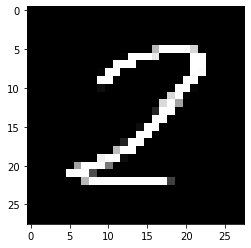


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



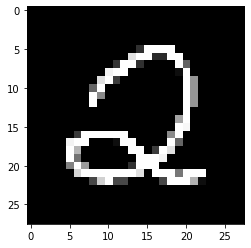


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



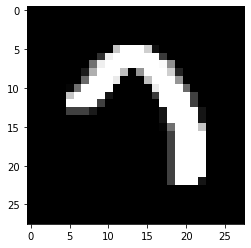


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



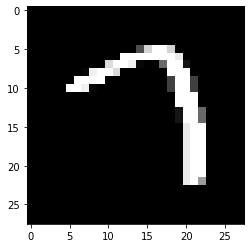


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



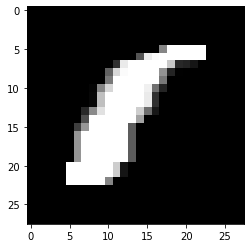


Final Output: 5

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



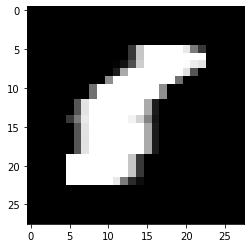


Final Output: 8

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



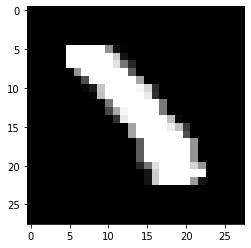


Final Output: 4

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



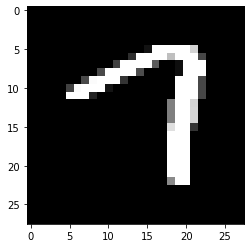


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



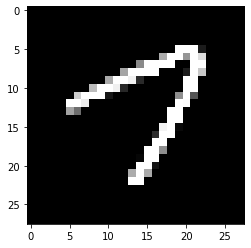


Final Output: 2

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



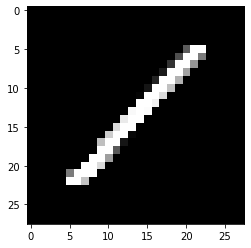


Final Output: 1

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------

=========PREDICTION============ 



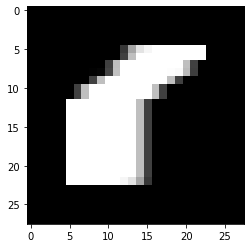


Final Output: 8

Hard-maxed form of the prediction: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

---------------------------------------



In [48]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    print ("=========PREDICTION============ \n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))
    print ("\n---------------------------------------\n")